Running inference on image pairs
============================

If you want to use a pre-trained PWC-Net model on your own set of images, you can pass a list of image pairs to a `ModelPWCNet` object using its  `predict_from_img_pairs()` method, as demonstrated here.

Below, look for `TODO` references and customize this notebook based on your own needs.

In [1]:
"""
pwcnet_predict_from_img_pairs.ipynb

Run inference on a list of images pairs.

Written by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)
"""
from __future__ import absolute_import, division, print_function
from copy import deepcopy
# from skimage.io import imread
from cv2 import imread
import cv2
from model_pwcnet import ModelPWCNet, _DEFAULT_PWCNET_TEST_OPTIONS
from visualize import display_img_pairs_w_flows
import rawpy
import numpy as np

In [2]:
# TODO: Set device to use for inference
# Here, we're using a GPU (use '/device:CPU:0' to run inference on the CPU)
gpu_devices = ['/device:GPU:0']  
controller = '/device:GPU:0'

# TODO: Set the path to the trained model (make sure you've downloaded it first from http://bit.ly/tfoptflow)
# ckpt_path = './models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000'
# ckpt_path = '../../data/tfoptflow/3-pwcnet-sm-6-2-cyclic-chairsthingsmix/pwcnet.ckpt-50000'

# ckpt_path = '../../../workplace/3-noise-model/final/zmf-origChair/pwcnet.ckpt-50000'
# ckpt_path = '../../../workplace/3-noise-model/final/zmf-try-my-raw-6-pwcnet-lg-6-2-cyclic/pwcnet.ckpt-50000'
# ckpt_path = '../../../workplace/3-noise-model/final/train-on-white-noise/pwcnet.ckpt-50000'
# ckpt_path = '../../../workplace/3-noise-model/zmf-finetune/pwcnet.ckpt-48000'

ckpt_path = '../../../workplace/3-noise-model/mix/zmf-allmyppm/pwcnet.ckpt-50000'
# ckpt_path = '../../../workplace/3-noise-model/mix/zmf-mixwhite/pwcnet.ckpt-50000'

In [3]:
# img_pairs = []
# image_path1 = '../../../workplace/3-noise-model/cross/mine/2030/02700_img1.ppm'
# image_path2 = '../../../workplace/3-noise-model/cross/mine/2030/02700_img2.ppm'
# image1, image2 = imread(image_path1), imread(image_path2)
# image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
# img_pairs.append((image1/255.0, image2/255.0))
# image_path1 = '../../../workplace/3-noise-model/cross/mine/2030/02713_img1.ppm'
# image_path2 = '../../../workplace/3-noise-model/cross/mine/2030/02713_img2.ppm'
# image1, image2 = imread(image_path1), imread(image_path2)
# image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
# img_pairs.append((image1/255.0, image2/255.0))
# image_path1 = '../../../workplace/3-noise-model/cross/mine/2030/02734_img1.ppm'
# image_path2 = '../../../workplace/3-noise-model/cross/mine/2030/02734_img2.ppm'
# image1, image2 = imread(image_path1), imread(image_path2)
# image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
# img_pairs.append((image1/255.0, image2/255.0))
# image_path1 = '../../../workplace/3-noise-model/cross/mine/2030/02764_img1.ppm'
# image_path2 = '../../../workplace/3-noise-model/cross/mine/2030/02764_img2.ppm'
# image1, image2 = imread(image_path1), imread(image_path2)
# image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
# img_pairs.append((image1/255.0, image2/255.0))

In [4]:
img_pairs = []
image_path1 = '../../../workplace/3-noise-model/cross/white/2030/02700_img1.ppm'
image_path2 = '../../../workplace/3-noise-model/cross/white/2030/02700_img2.ppm'
image1, image2 = imread(image_path1), imread(image_path2)
image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
img_pairs.append((image1/255.0, image2/255.0))
image_path1 = '../../../workplace/3-noise-model/cross/white/2030/02713_img1.ppm'
image_path2 = '../../../workplace/3-noise-model/cross/white/2030/02713_img2.ppm'
image1, image2 = imread(image_path1), imread(image_path2)
image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
img_pairs.append((image1/255.0, image2/255.0))
image_path1 = '../../../workplace/3-noise-model/cross/white/2030/02734_img1.ppm'
image_path2 = '../../../workplace/3-noise-model/cross/white/2030/02734_img2.ppm'
image1, image2 = imread(image_path1), imread(image_path2)
image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
img_pairs.append((image1/255.0, image2/255.0))
image_path1 = '../../../workplace/3-noise-model/cross/white/2030/02764_img1.ppm'
image_path2 = '../../../workplace/3-noise-model/cross/white/2030/02764_img2.ppm'
image1, image2 = imread(image_path1), imread(image_path2)
image1, image2 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB),cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
img_pairs.append((image1/255.0, image2/255.0))

In [5]:
# Configure the model for inference, starting with the default options
nn_opts = deepcopy(_DEFAULT_PWCNET_TEST_OPTIONS)
nn_opts['verbose'] = True
nn_opts['ckpt_path'] = ckpt_path
nn_opts['batch_size'] = 1
nn_opts['gpu_devices'] = gpu_devices
nn_opts['controller'] = controller

# We're running the PWC-Net-large model in quarter-resolution mode
# That is, with a 6 level pyramid, and upsampling of level 2 by 4 in each dimension as the final flow prediction
nn_opts['use_dense_cx'] = True
nn_opts['use_res_cx'] = True
nn_opts['pyr_lvls'] = 6
nn_opts['flow_pred_lvl'] = 2

# The size of the images in this dataset are not multiples of 64, while the model generates flows padded to multiples
# of 64. Hence, we need to crop the predicted flows to their original size
nn_opts['adapt_info'] = (1, 436, 1024, 2)

In [6]:
# Instantiate the model in inference mode and display the model configuration
nn = ModelPWCNet(mode='test', options=nn_opts)
nn.print_config()

W1022 10:43:48.264577 139679331936064 deprecation_wrapper.py:119] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_base.py:59: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1022 10:43:48.268619 139679331936064 deprecation_wrapper.py:119] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_base.py:77: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1022 10:43:48.270272 139679331936064 deprecation_wrapper.py:119] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_base.py:82: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1022 10:43:48.441779 139679331936064 deprecation_wrapper.py:119] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_base.py:86: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W1022 10:43:48.442265 139679331936064 deprecation_wrapper.py:119] From /

Building model...


W1022 10:43:49.116446 139679331936064 deprecation.py:506] From /home/zhangmf/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1022 10:43:49.292867 139679331936064 deprecation.py:323] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_pwcnet.py:1221: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
W1022 10:43:51.712721 139679331936064 deprecation_wrapper.py:119] From /home/zhangmf/Documents/Github/tfoptflow/tfoptflow/model_pwcnet.py:1590: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.

W1022 10:43:5

... model built.
Loading model checkpoint ../../../workplace/3-noise-model/mix/zmf-allmyppm/pwcnet.ckpt-50000 for eval or testing...

... model loaded

Model Configuration:
  verbose                True
  ckpt_path              ../../../workplace/3-noise-model/mix/zmf-allmyppm/pwcnet.ckpt-50000
  x_dtype                <dtype: 'float32'>
  x_shape                [2, None, None, 3]
  y_dtype                <dtype: 'float32'>
  y_shape                [None, None, 2]
  gpu_devices            ['/device:GPU:0']
  controller             /device:GPU:0
  batch_size             1
  use_tf_data            True
  use_mixed_precision    False
  pyr_lvls               6
  flow_pred_lvl          2
  search_range           4
  use_dense_cx           True
  use_res_cx             True
  adapt_info             (1, 436, 1024, 2)
  mode                   test
  trainable params       14079050


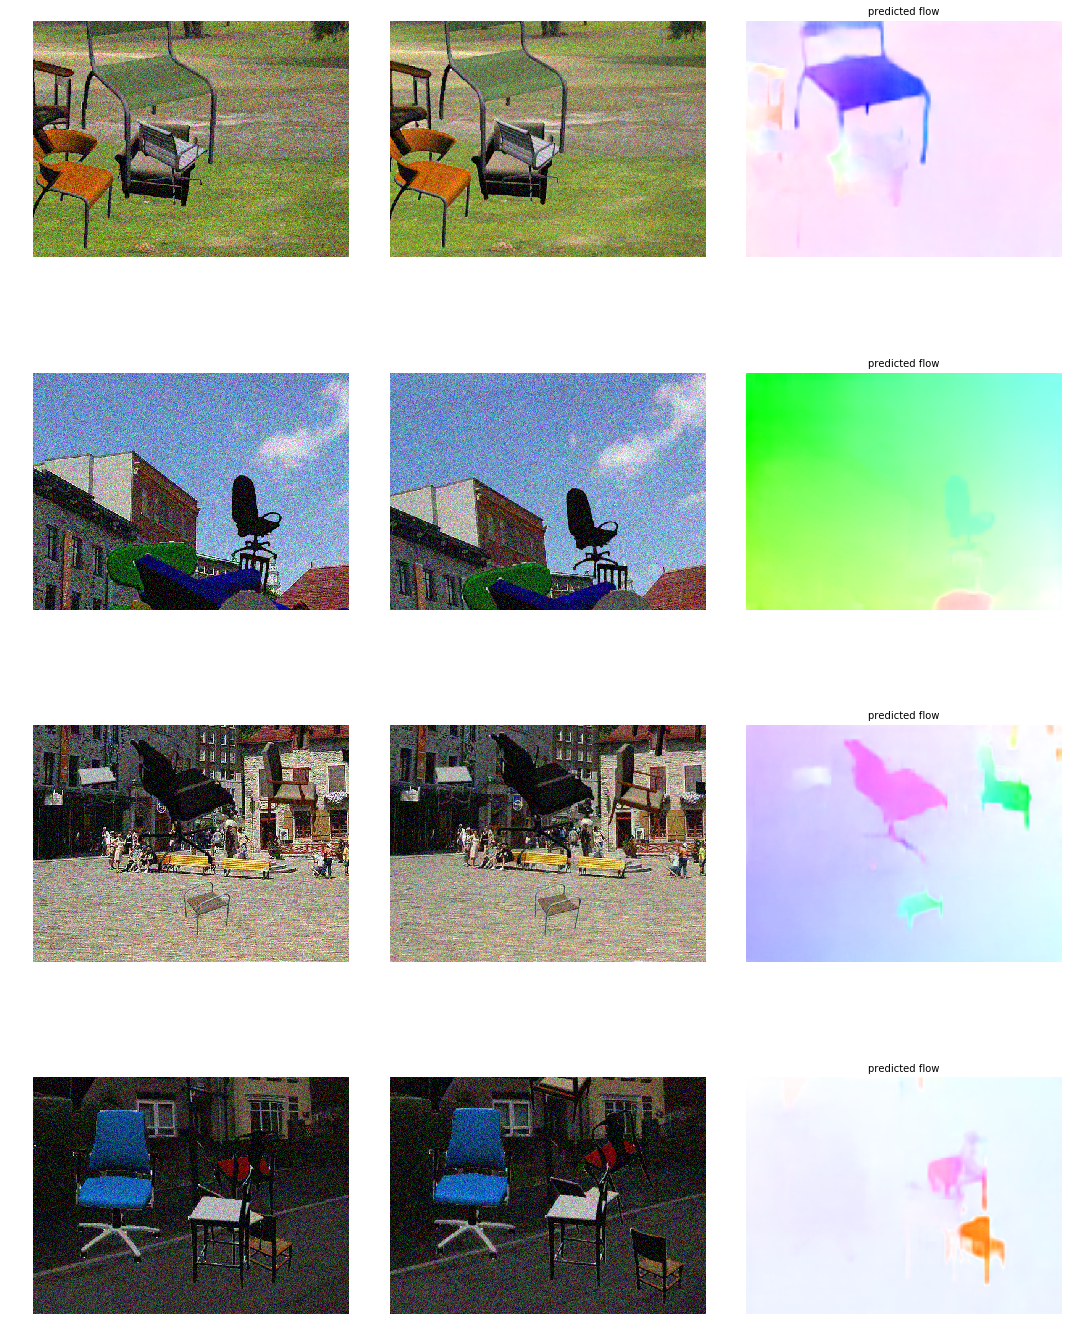

In [7]:
# Generate the predictions and display them
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
display_img_pairs_w_flows(img_pairs, pred_labels)